### IMPORTATION DES BIBLIOTHEQUES UTILS

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import seaborn as sns


### DEFINIR LE DATASET

In [29]:
train_dir = 'train'
test_dir = 'test'


### 

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         
    shear_range=0.2,        
    zoom_range=0.2,          
    horizontal_flip=True    
)


test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary'      # Since it's a binary classification problem (NORMAL or PNEUMONIA)
)

Found 5232 images belonging to 2 classes.


In [32]:
# Flow validation images in batches of 32 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [33]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

train_normal_count = len(os.listdir(train_normal_dir))
train_pneumonia_count = len(os.listdir(train_pneumonia_dir))

test_normal_count = len(os.listdir(test_normal_dir))
test_pneumonia_count = len(os.listdir(test_pneumonia_dir))

print(f'Training set - NORMAL: {train_normal_count}, PNEUMONIA: {train_pneumonia_count}')
print(f'Test set - NORMAL: {test_normal_count}, PNEUMONIA: {test_pneumonia_count}')


Training set - NORMAL: 1349, PNEUMONIA: 3883
Test set - NORMAL: 234, PNEUMONIA: 390


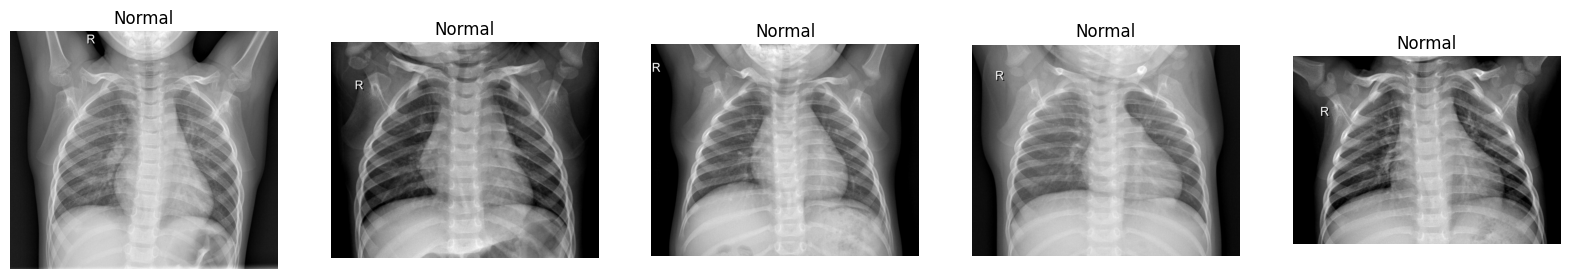

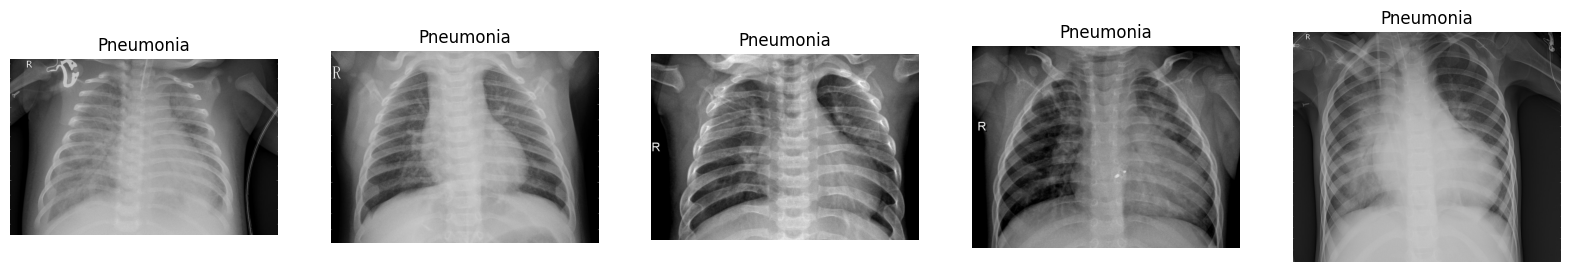

In [34]:
def plot_images(img_paths, labels, n=5):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        img = load_img(img_paths[i])
        img_array = img_to_array(img)
        plt.subplot(1, n, i+1)
        plt.imshow(np.uint8(img_array))
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Plot some training images
train_normal_imgs = [os.path.join(train_normal_dir, img) for img in os.listdir(train_normal_dir)[:5]]
train_pneumonia_imgs = [os.path.join(train_pneumonia_dir, img) for img in os.listdir(train_pneumonia_dir)[:5]]

plot_images(train_normal_imgs, ['Normal']*5)
plot_images(train_pneumonia_imgs, ['Pneumonia']*5)


In [35]:
# Image Shape
img = load_img(train_normal_imgs[0])
img_array = img_to_array(img)
print(f'Image shape: {img_array.shape}')


Image shape: (1858, 2090, 3)


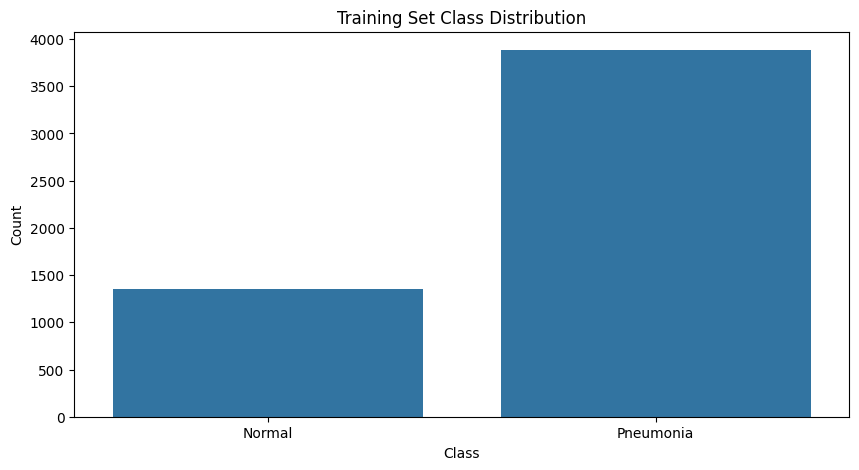

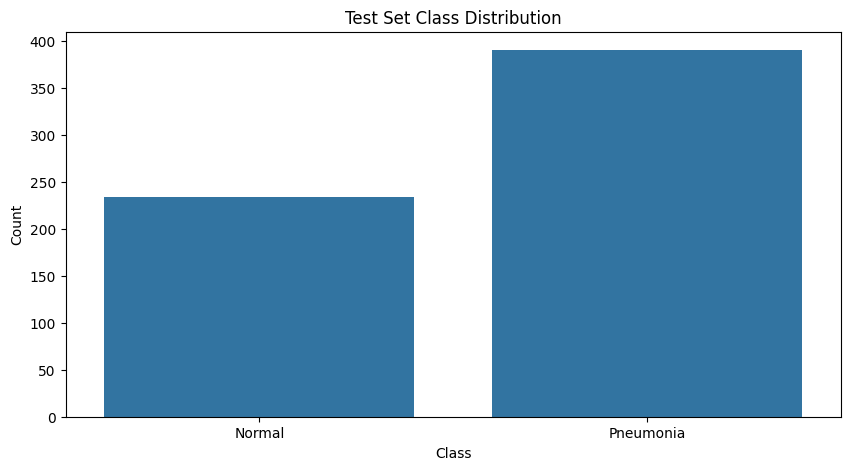

In [36]:
class_names = ['Normal', 'Pneumonia']
train_counts = [train_normal_count, train_pneumonia_count]
test_counts = [test_normal_count, test_pneumonia_count]

plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=train_counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=test_counts)
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [42]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])


In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [44]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/15


c:\Users\DjibrilNdiaye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 448s 3s/step - accuracy: 0.7634 - loss: 0.6207 - val_accuracy: 0.7993 - val_loss: 0.5398
Epoch 2/15
  1/163 ━━━━━━━━━━━━━━━━━━━━ 2:25 901ms/step - accuracy: 1.0000 - loss: 0.1080

c:\Users\DjibrilNdiaye\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.1080 - val_accuracy: 0.8125 - val_loss: 0.3343
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.8928 - loss: 0.2600 - val_accuracy: 0.7928 - val_loss: 0.5070
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.4027 - val_accuracy: 0.7500 - val_loss: 0.7062
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step - accuracy: 0.9027 - loss: 0.2367 - val_accuracy: 0.8355 - val_loss: 0.4090
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0977 - val_accuracy: 0.8750 - val_loss: 0.1853
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.9200 - loss: 0.2041 - val_accuracy: 0.8339 - val_loss: 0.4221
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2487 - val_accuracy: 0.9375 - val_loss: 0.1323
Epoch 9/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - accuracy: 0.9272 - loss: 0.1825 - val_accuracy: 0.8668 - 

In [45]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 901ms/step - accuracy: 0.8915 - loss: 0.2817
Test accuracy: 0.8815789222717285, Test loss: 0.32639509439468384


In [46]:
# Enregistrer le modèle
model.save('pneumonia_model.h5')
print('Model saved as pneumonia_model.h5')


Model saved as pneumonia_model.h5


In [47]:
# Faire des prédictions
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale
    return img_array

def predict_image(img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    return 'Pneumonia' if prediction[0] > 0.5 else 'Normal'

# Exemple de prédiction
img_path = 'test.jpeg'
prediction = predict_image(img_path)
print(f'The prediction for the image is: {prediction}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
The prediction for the image is: Pneumonia
